In [1]:
import matplotlib.pyplot as plt
import gym
import numpy as np
from ppo import Agent
import torch as T

C:\Users\MSI\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\MSI\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\MSI\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [6]:
def train(n_episodes,env_name):
    env=gym.make(env_name)
    N = 20
    batch_size=5
    n_epochs = 4
    alpha = 0.0003
    agent=Agent(n_actions=env.action_space.n,batch_size=batch_size,alpha=alpha,n_epochs = n_epochs,input_dims=env.observation_space.shape)
    best_score=env.reward_range[0]
    score_history=[]
    avg_score_arr=[]
    learn_iters =0
    avg_score = 0
    n_steps =0
    for i in range(n_episodes+1):
        observation = env.reset()
        done=False
        score =0
        while not done:
            action,prob,val = agent.choose_action(observation)
            observation_,reward,done,info=env.step(action)
            n_steps +=1
            score +=reward
            agent.remember(observation,action,prob,val,reward,done)
            if n_steps %N == 0:
                agent.learn()
                learn_iters+=1
            observation=observation_
        score_history.append(score)
        avg_score = np.mean(score_history[-100:])
        avg_score_arr.append(avg_score)
        if avg_score > best_score:
            best_score=avg_score
            agent.save_models()
        
        print('episode ',i,' score %.1f ' %score,' avg score %.1f' %avg_score,'time steps',n_steps,'learning steps', learn_iters)
        if (score >=180.0) and (best_score>=124.0): #ideally score >=200.0 and best score >= 190.0 but it takes too much episodes 
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i, best_score))
            
            break
    return avg_score, score_history,avg_score_arr
    

In [14]:
avg_score, score_history ,avg_score_arr= train(1000,'CartPole-v0')

... saving models ...
episode  0  score 24.0   avg score 24.0 time steps 24 learning steps 1
... saving models ...
episode  1  score 38.0   avg score 31.0 time steps 62 learning steps 3
... saving models ...
episode  2  score 55.0   avg score 39.0 time steps 117 learning steps 5
... saving models ...
episode  3  score 55.0   avg score 43.0 time steps 172 learning steps 8
... saving models ...
episode  4  score 87.0   avg score 51.8 time steps 259 learning steps 12
... saving models ...
episode  5  score 90.0   avg score 58.2 time steps 349 learning steps 17
... saving models ...
episode  6  score 71.0   avg score 60.0 time steps 420 learning steps 21
episode  7  score 53.0   avg score 59.1 time steps 473 learning steps 23
... saving models ...
episode  8  score 75.0   avg score 60.9 time steps 548 learning steps 27
episode  9  score 33.0   avg score 58.1 time steps 581 learning steps 29
... saving models ...
episode  10  score 102.0   avg score 62.1 time steps 683 learning steps 34
...

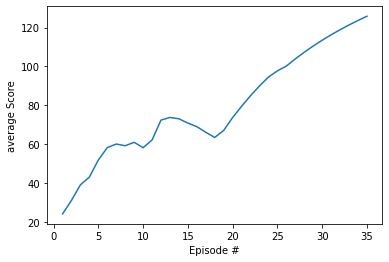

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(avg_score_arr)+1), avg_score_arr)
plt.ylabel('average Score')
plt.xlabel('Episode #')
plt.show()

In [6]:
env=gym.make('CartPole-v0')
agent=Agent(n_actions=env.action_space.n,batch_size=5,alpha=0.0003,n_epochs = 4,input_dims=env.observation_space.shape)
agent.load_models()

for i in range(5):
    state = env.reset()
    for j in range(1000):
        action,_,_ = agent.choose_action(state)
        env.render()
        
        state,reward,done,_ = env.step(action)
        if done:
            break

env.close()

... loading models ...
